In [1]:
%config Completer.use_jedi = False
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids2020/unlabeled.csv
/kaggle/input/wids2020/WiDS Datathon 2020 Dictionary.csv
/kaggle/input/wids2020/samplesubmission.csv
/kaggle/input/wids2020/solution_template.csv
/kaggle/input/wids2020/training_v2.csv


In [2]:
tr_data = pd.read_csv('/kaggle/input/wids2020/training_v2.csv')

In [3]:
# How many columns / rows do we have in each of them?
# number of rows:
print(len(tr_data))
# number of cols
print(len(tr_data.columns))
print(f'tr_data had {tr_data.shape[0]} rows and {tr_data.shape[1]} cols')
# What is the data type of each column?
tr_data.dtypes

91713
186
tr_data had 91713 rows and 186 cols


encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [4]:
tr_data.head(2)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [5]:
tr_data.head(5).T

,0,1,2,3,4
encounter_id,66154,114252,119783,79267,92056
patient_id,25312,59342,50777,46918,34377
hospital_id,118,81,118,118,33
hospital_death,0,0,0,0,0
age,68.0,77.0,25.0,81.0,19.0
bmi,22.73,27.42,31.95,22.64,NaN
elective_surgery,0,0,0,1,0
ethnicity,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,M,F,F,F,M
height,180.3,160.0,172.7,165.1,188.0


In [6]:
tr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,91713.0,65606.079280,37795.088538,1.000000,32852.000000,65665.000000,98342.000000,131051.000000
patient_id,91713.0,65537.131464,37811.252183,1.000000,32830.000000,65413.000000,98298.000000,131051.000000
hospital_id,91713.0,105.669262,62.854406,2.000000,47.000000,109.000000,161.000000,204.000000
hospital_death,91713.0,0.086302,0.280811,0.000000,0.000000,0.000000,0.000000,1.000000
age,87485.0,62.309516,16.775119,16.000000,52.000000,65.000000,75.000000,89.000000
bmi,88284.0,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.814990
elective_surgery,91713.0,0.183736,0.387271,0.000000,0.000000,0.000000,0.000000,1.000000
height,90379.0,169.641588,10.795378,137.200000,162.500000,170.100000,177.800000,195.590000
icu_id,91713.0,508.357692,228.989661,82.000000,369.000000,504.000000,679.000000,927.000000
pre_icu_los_days,91713.0,0.835766,2.487756,-24.947222,0.035417,0.138889,0.409028,159.090972


In [7]:
# how many missing values in the cols 
description = tr_data.describe().T
description['missing'] = [tr_data[c].isnull().sum() for c in description.index.values]
description['num_unique'] = [tr_data[c].unique for c in description.index.values]

description

,count,mean,std,min,25%,50%,75%,max,missing,num_unique
encounter_id,91713.0,65606.079280,37795.088538,1.000000,32852.000000,65665.000000,98342.000000,131051.000000,0,<bound method Series.unique of 0 66154...
patient_id,91713.0,65537.131464,37811.252183,1.000000,32830.000000,65413.000000,98298.000000,131051.000000,0,<bound method Series.unique of 0 25312...
hospital_id,91713.0,105.669262,62.854406,2.000000,47.000000,109.000000,161.000000,204.000000,0,<bound method Series.unique of 0 118\n1...
hospital_death,91713.0,0.086302,0.280811,0.000000,0.000000,0.000000,0.000000,1.000000,0,<bound method Series.unique of 0 0\n1 ...
age,87485.0,62.309516,16.775119,16.000000,52.000000,65.000000,75.000000,89.000000,4228,<bound method Series.unique of 0 68.0\n...
bmi,88284.0,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.814990,3429,<bound method Series.unique of 0 22.730...
elective_surgery,91713.0,0.183736,0.387271,0.000000,0.000000,0.000000,0.000000,1.000000,0,<bound method Series.unique of 0 0\n1 ...
height,90379.0,169.641588,10.795378,137.200000,162.500000,170.100000,177.800000,195.590000,1334,<bound method Series.unique of 0 180.3\...
icu_id,91713.0,508.357692,228.989661,82.000000,369.000000,504.000000,679.000000,927.000000,0,<bound method Series.unique of 0 92\n1...
pre_icu_los_days,91713.0,0.835766,2.487756,-24.947222,0.035417,0.138889,0.409028,159.090972,0,<bound method Series.unique of 0 0.5416...


In [8]:
non_numeric = [c for c in tr_data.columns if c not in description.index.values]
non_numeric

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [9]:
# Present a dictionary with the k most frequent values per each textual (string) columns

# A single case:
c = 'ethnicity'; k = 4
tr_data[c].value_counts()[:k].reset_index().rename(columns={c:c+'_count', 'index':c})



# The whole dataset
def get_k_uniques_and_counts(df, k):
    return pd.concat([df[c].value_counts()[:k].reset_index().rename(columns={c:c+'_count', 'index':c}) for c in df.columns],
                    axis = 1)

get_k_uniques_and_counts(tr_data[non_numeric], 5).T.fillna('')

,0,1,2,3,4
ethnicity,Caucasian,African American,Other/Unknown,Hispanic,Asian
ethnicity_count,70684,9547,4374,3796,1129
gender,M,F,,,
gender_count,49469.0,42219.0,,,
hospital_admit_source,Emergency Department,Operating Room,Floor,Direct Admit,Recovery Room
hospital_admit_source_count,36962,9787,8055,6441,2896
icu_admit_source,Accident & Emergency,Operating Room / Recovery,Floor,Other Hospital,Other ICU
icu_admit_source_count,54060,18713,15611,2358,859
icu_stay_type,admit,transfer,readmit,,
icu_stay_type_count,86183.0,4970.0,560.0,,


<AxesSubplot:>

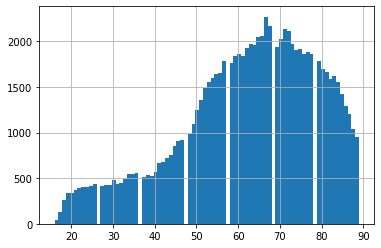

In [10]:
tr_data['age'].hist(bins=80)

array([  44.,  126.,  259.,    0.,  343.,  338.,  372.,    0.,  389.,
        400.,  401.,    0.,  415.,  432.,    0.,  410.,  425.,  421.,
          0.,  477.,  431.,  449.,    0.,  496.,  544.,    0.,  551.,
        558.,  509.,    0.,  535.,  526.,  573.,    0.,  671.,  674.,
        727.,    0.,  752.,  856.,    0.,  908.,  921.,  983.,    0.,
       1096., 1253., 1357.,    0., 1484., 1550.,    0., 1598., 1644.,
       1651.,    0., 1782., 1763., 1836.,    0., 1858., 1842.,    0.,
       1930., 1977., 1956.,    0., 2051., 2059., 2271.,    0., 2173.,
       1935., 2032.,    0., 2141., 2110.,    0., 1972., 1901., 1916.,
          0., 1859., 1883., 1866.,    0., 1783., 1702.,    0., 1661.,
       1590., 1616.,    0., 1560., 1418., 1295.,    0., 1204., 1042.,
        952.])

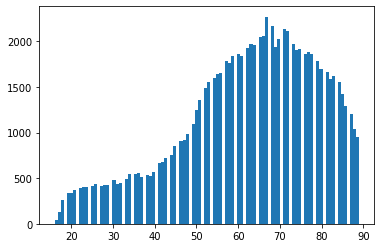

In [11]:
q = plt.hist(tr_data['age'], bins = 100)
q[0]

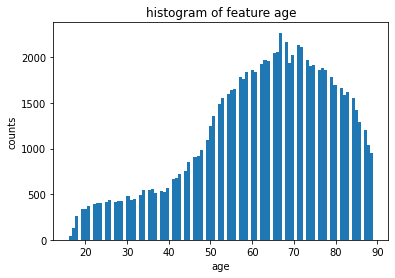

In [12]:
c = 'age'
_ = plt.hist(tr_data[c], bins = 100)
_ = plt.title(f'histogram of feature {c}')
_ = plt.xlabel(c)
_ = plt.ylabel('counts')

(0.0, 500.0)

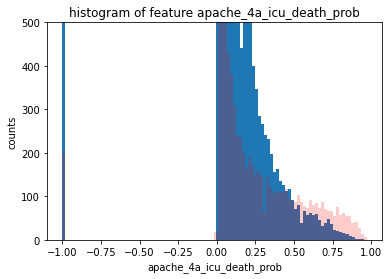

In [13]:
c = 'age'
c = 'apache_4a_icu_death_prob'
_ = plt.hist(tr_data[c].values[tr_data['hospital_death']==0], bins = 100)
_ = plt.hist(tr_data[c].values[tr_data['hospital_death']==1], bins = 100, color = 'r', alpha=0.2)
_ = plt.title(f'histogram of feature {c}')
_ = plt.xlabel(c)
_ = plt.ylabel('counts')
plt.ylim(0, 500)

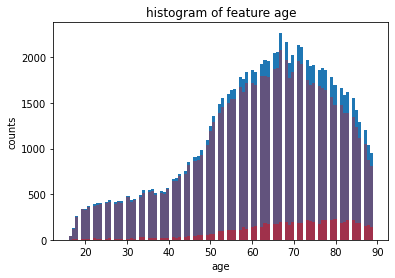

In [14]:
 c = 'age'
_ = plt.hist(tr_data[c].values, bins = 100)
_ = plt.hist(tr_data[c].values[tr_data['hospital_death']==0], bins = 100, color = 'r', alpha=0.3)
_ = plt.hist(tr_data[c].values[tr_data['hospital_death']==1], bins = 100, color = 'r', alpha=0.4)
_ = plt.title(f'histogram of feature {c}')
_ = plt.xlabel(c)
_ = plt.ylabel('counts')


CPU times: user 4.15 s, sys: 77 ms, total: 4.23 s
Wall time: 4.23 s


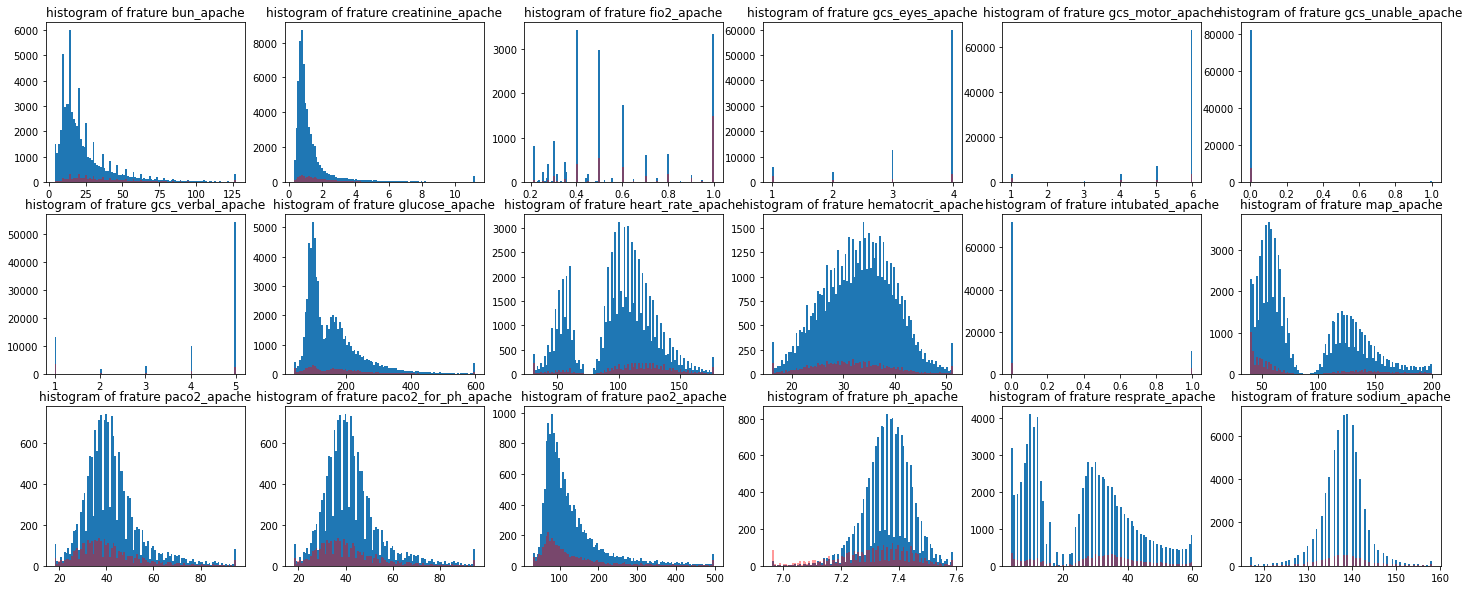

In [15]:
%%time
# drawing more than a single plot
#figsize = size of printable area
# ax is array of axis's


def hist_grid_plot(df, nrows=2, ncols=6, figsize = (25, 8), skip = 0):
    description = df.describe().T
    fig, ax = plt.subplots(nrows, ncols, figsize= figsize)

    for i,c in enumerate(description.index.values[skip:skip+nrows*ncols]):
        ax[i//ncols,i%ncols].hist(tr_data[c].values[tr_data['hospital_death']==0], bins = 100)
        ax[i//ncols,i%ncols].hist(tr_data[c].values[tr_data['hospital_death']==1], bins = 100, color = 'r', alpha=0.4)
        ax[i//ncols,i%ncols].set_title(f'histogram of frature {c}')

hist_grid_plot(tr_data, nrows = 3, figsize= (25,10),skip= 18)

In [16]:
death_rate_per_hospital = tr_data.pivot_table(index='hospital_id', values='hospital_death', aggfunc=['sum', 'count'])
death_rate_per_hospital.columns = ['count_hospital_death', 'sum_hospital_death']
death_rate_per_hospital['death_rate'] = death_rate_per_hospital['sum_hospital_death'] / death_rate_per_hospital['count_hospital_death']
death_rate_per_hospital.sort_values('death_rate', ascending = True)

,count_hospital_death,sum_hospital_death,death_rate
hospital_id,,,
130,1,2,2.000000
51,32,110,3.437500
155,19,92,4.842105
29,9,50,5.555556
145,88,492,5.590909
76,208,1312,6.307692
71,25,168,6.720000
14,115,792,6.886957
32,130,902,6.938462


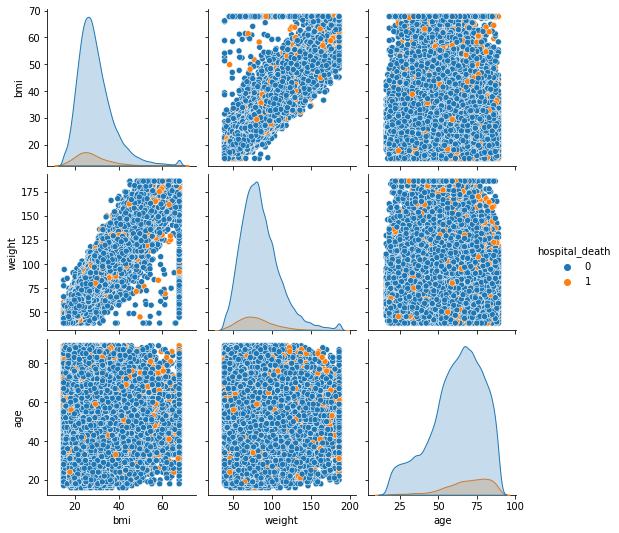

In [17]:
import seaborn as sns
sns.pairplot(tr_data[['bmi', 'weight', 'age', 'hospital_death']], hue='hospital_death')

In [18]:
from sklearn.metrics import classification_report, roc_auc_score as auc
print(classification_report(tr_data['hospital_death'], tr_data['apache_4a_hospital_death_prob']> 0.5))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     83798
           1       0.56      0.29      0.38      7915

    accuracy                           0.92     91713
   macro avg       0.75      0.63      0.67     91713
weighted avg       0.90      0.92      0.91     91713



In [19]:
# auc = area under the curve
print(auc(tr_data['hospital_death'], tr_data['apache_4a_hospital_death_prob'].fillna(0)))

0.7985641508306599


## Logistics regression, leaner regression
y = a1x1 + a2x2 + a3x3 +... + anxn + a0
Regression problem - When we are trying to estimate the value of conitiuos value
If we want to change the liniar function into classification problem, we will use zigmoid.
We will convert this formula into a zigmoid - which means we will get a value of 0 and 1.
0 - belongs to this group
1 - don't belongs

y = sigmoid(a1x1 + a2x2 + a3x3 +... + anxn + a0) => instaead of Y that is -inf to +inf, will get values of 0 to 1.


Assumptions:
Our features are independant from each-other
Uniform distribution
 








In [20]:
excluded_features = ['encounter_id', 'patient_id', 'hospital_death']
features = [c for c in description.index.values if c not in excluded_features]
features

['hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_mi

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tr_data[features], tr_data['hospital_death'], test_size=0.2, random_state=42, shuffle=True)
X_train




,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
4609,118,86.0,28.168975,0,170.2,100,0.000000,0,81.6,NaN,301.0,408.02,0,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,70.0,44.0,NaN,0.0,141.0,NaN,NaN,NaN,NaN,43.0,NaN,36.4,NaN,0.0,NaN,NaN,NaN,106.0,56.0,106.0,56.0,80.0,44.0,NaN,NaN,141.0,76.0,141.0,76.0,43.0,7.0,100.0,97.0,NaN,NaN,175.0,123.0,175.0,123.0,36.8,36.3,NaN,NaN,68.0,64.0,68.0,64.0,62.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,10.0,100.0,100.0,NaN,NaN,168.0,155.0,168.0,155.0,36.3,36.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,4.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75674,185,72.0,36.635088,0,170.1,687,0.088889,0,106.0,NaN,124.0,305.01,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,3.0,NaN,105.0,29.3,0.0,50.0,NaN,NaN,NaN,NaN,34.0,NaN,36.4,NaN,0.0,NaN,NaN,NaN,47.0,39.0,47.0,39.0,97.0,92.0,NaN,NaN,64.0,50.0,64.0,50.0,24.0,17.0,100.0,99.0,NaN,NaN,91.0,66.0,91.0,66.0,36.6,34.7,NaN,NaN,47.0,47.0,47.0,47.0,97.0,97.0,NaN,NaN,64.0,64.0,64.0

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train.fillna(0), y_train)


LogisticRegression(solver='liblinear')

In [23]:
pred = lr.predict_proba(X_val.fillna(0))